### 전처리 : preprocessing
- 데이터 분석을 하기위해 데이터를 정리하는 방법
- 문제정의 -> 데이터수집 -> 데이터처리(pandas) -> 데이터분석(모델링) -> 결론
- index
    - 결측데이터 검색
    - 결측데이터 처리
    - 스케일링 및 변환
    - 범주형 -> 수치형

In [9]:
%ls datas

2014_p.csv*        p_model.pkl        preprocessing.csv  train.csv*
2014_s.csv*        premierleague.csv* titanic.csv


In [10]:
df = pd.read_csv("datas/preprocessing.csv")
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,A
6,7.0,0.7,7.0,NaN,A


In [11]:
# 결측데이터 검색

In [12]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False


In [13]:
df.isna().sum()

x1    2
x2    3
x3    2
x4    1
x5    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      5 non-null      float64
 1   x2      4 non-null      float64
 2   x3      5 non-null      float64
 3   x4      6 non-null      object 
 4   x5      7 non-null      object 
dtypes: float64(3), object(2)
memory usage: 408.0+ bytes


In [15]:
# missingno package : pip install missingno

In [16]:
!pip install missingno

In [17]:
import missingno as msno

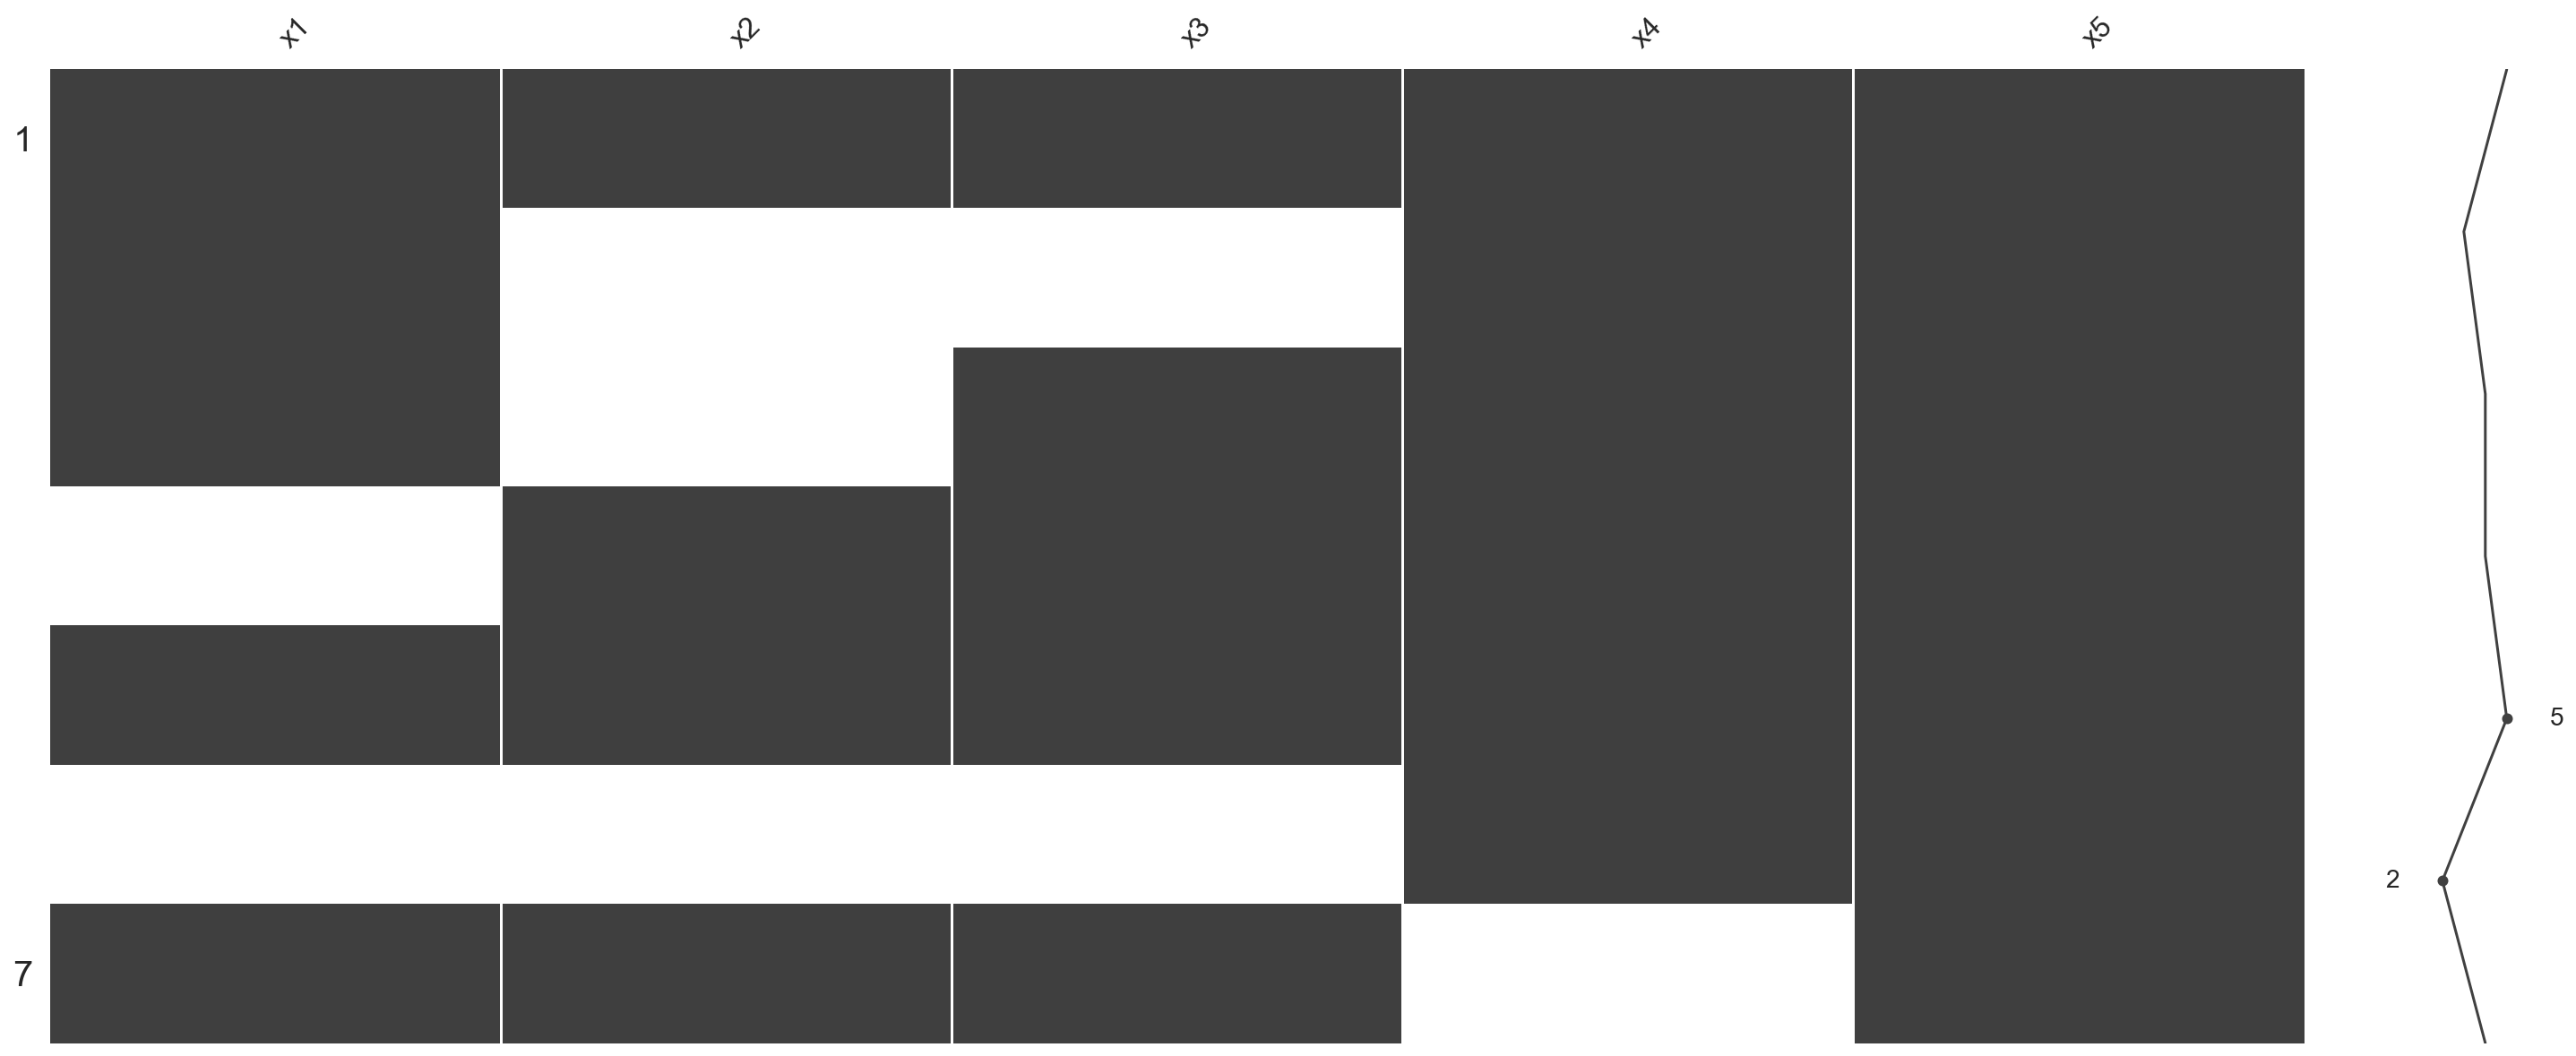

In [18]:
msno.matrix(df)

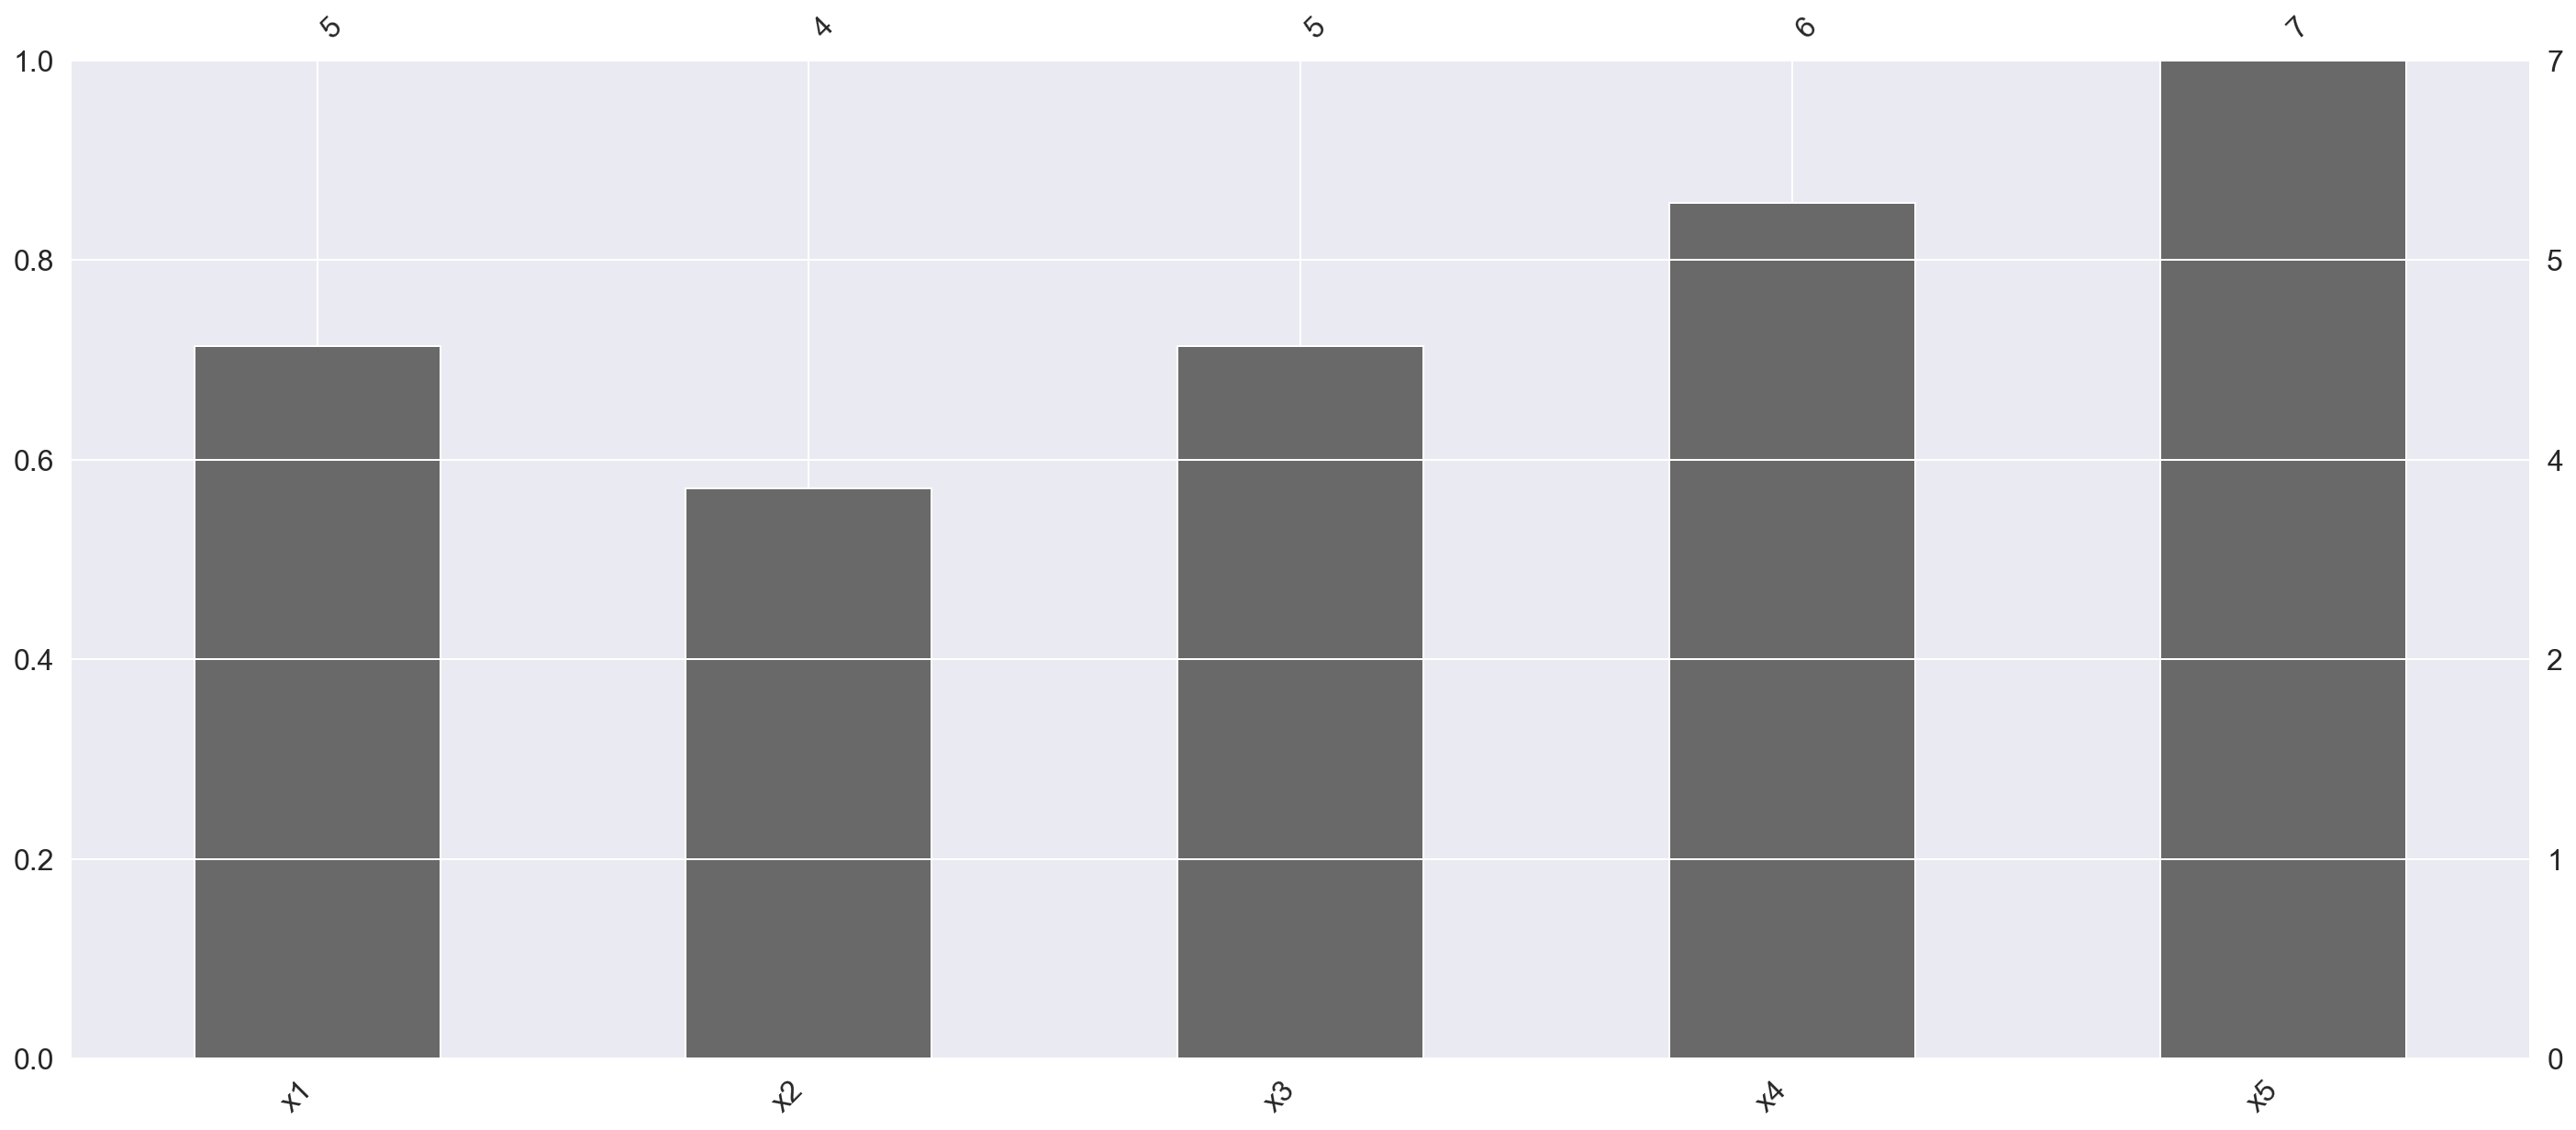

In [19]:
msno.bar(df)

In [20]:
titanic_df = pd.read_csv("datas/train.csv")
titanic_df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


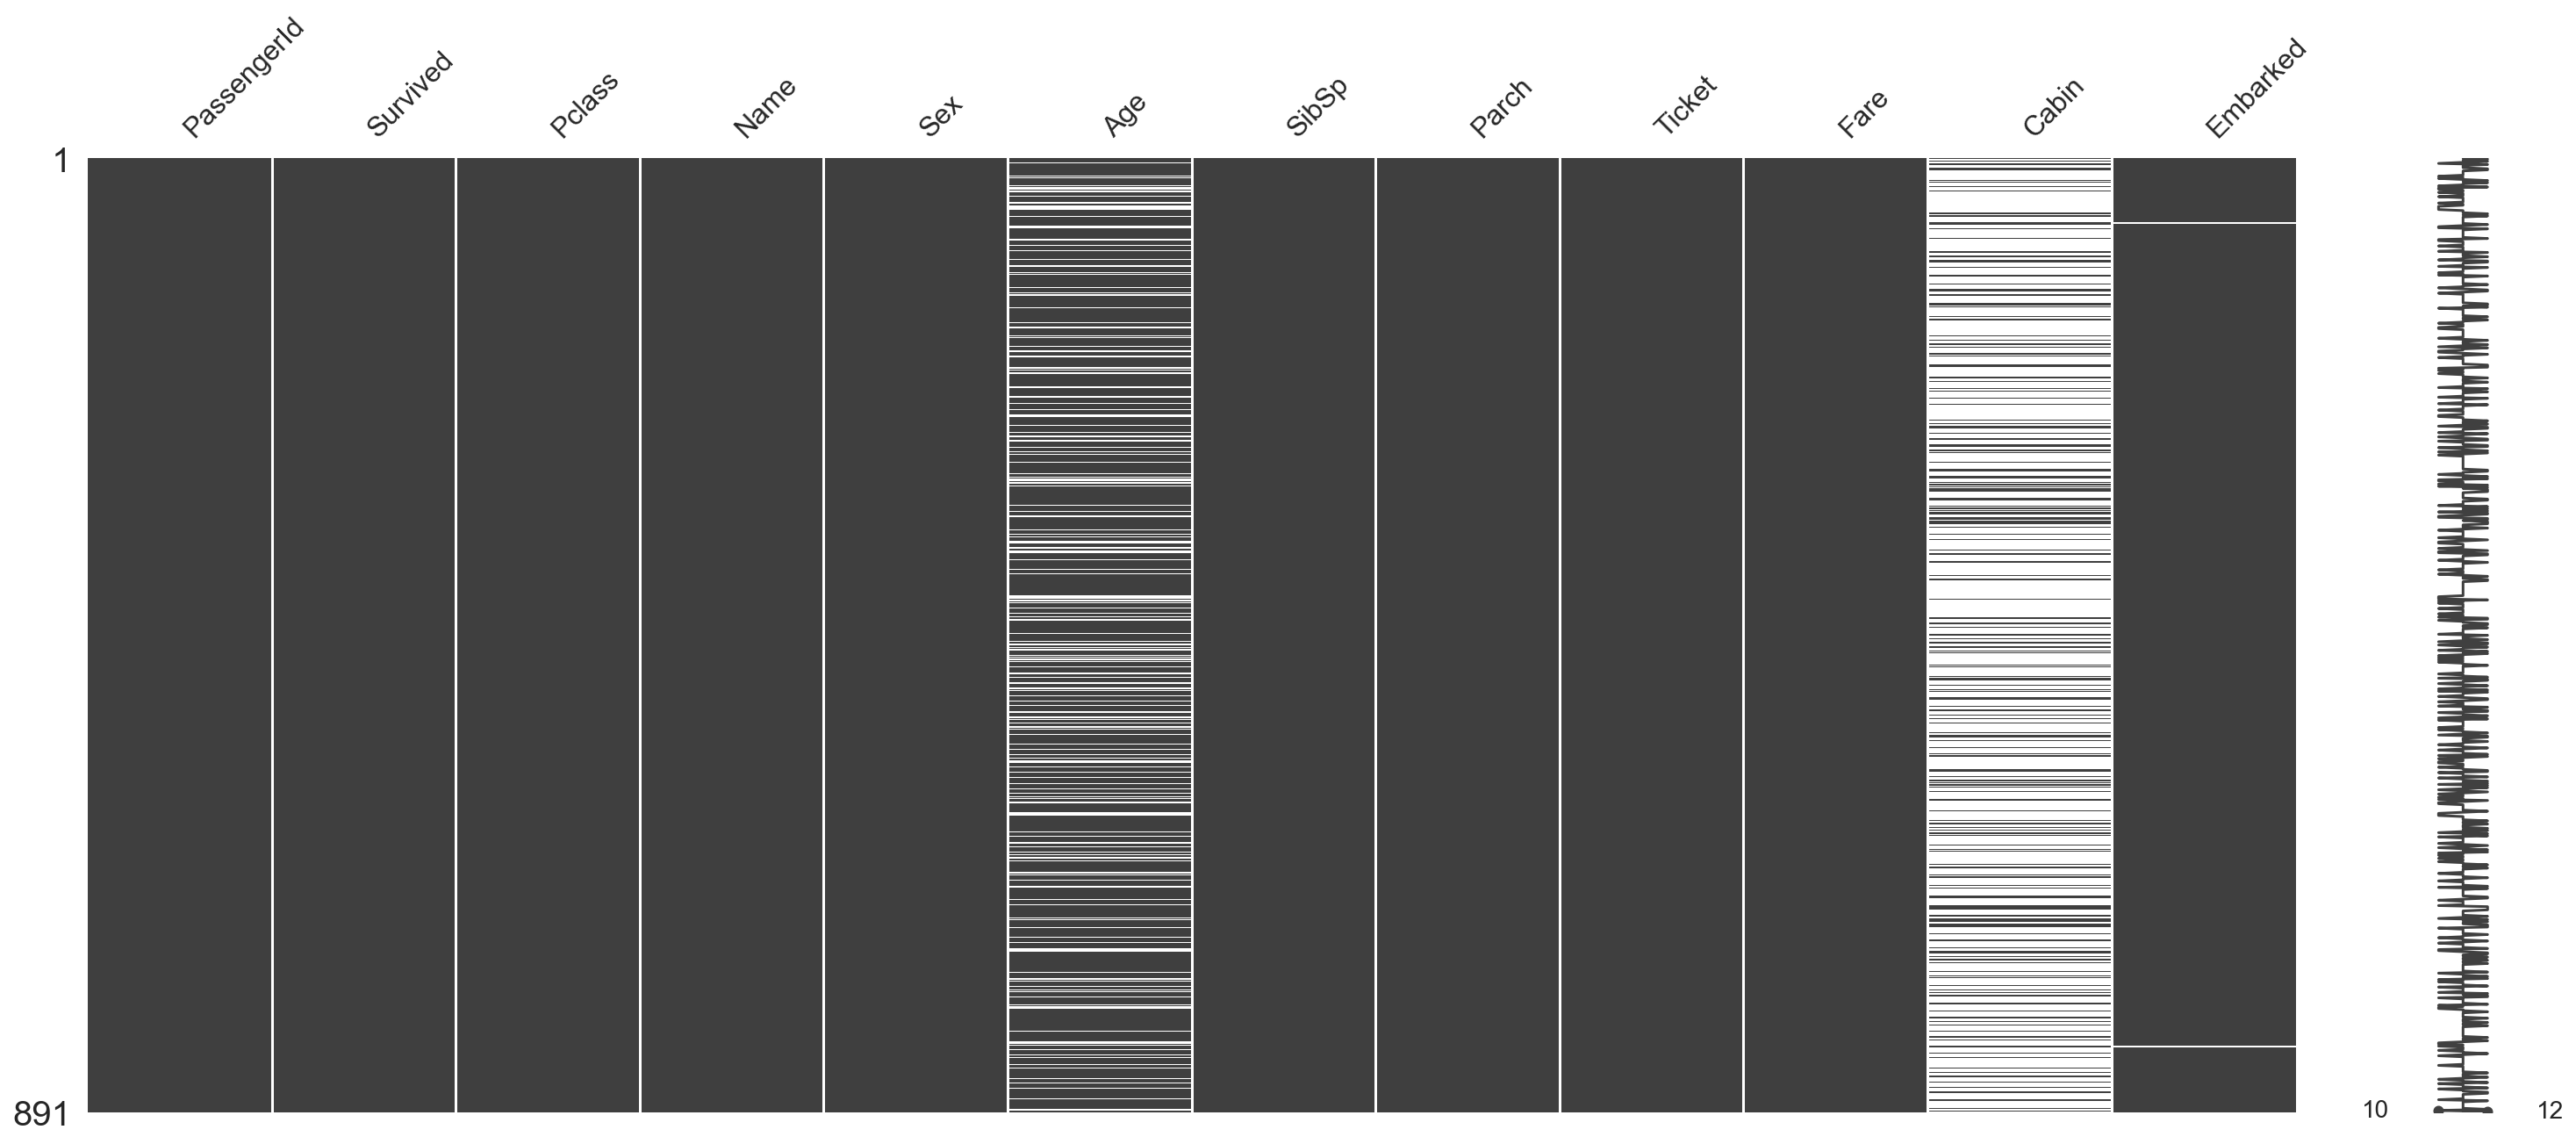

In [21]:
msno.matrix(titanic_df)

In [22]:
# 컬럼의 데이터가 20%이상 없으면 컬럼 삭제

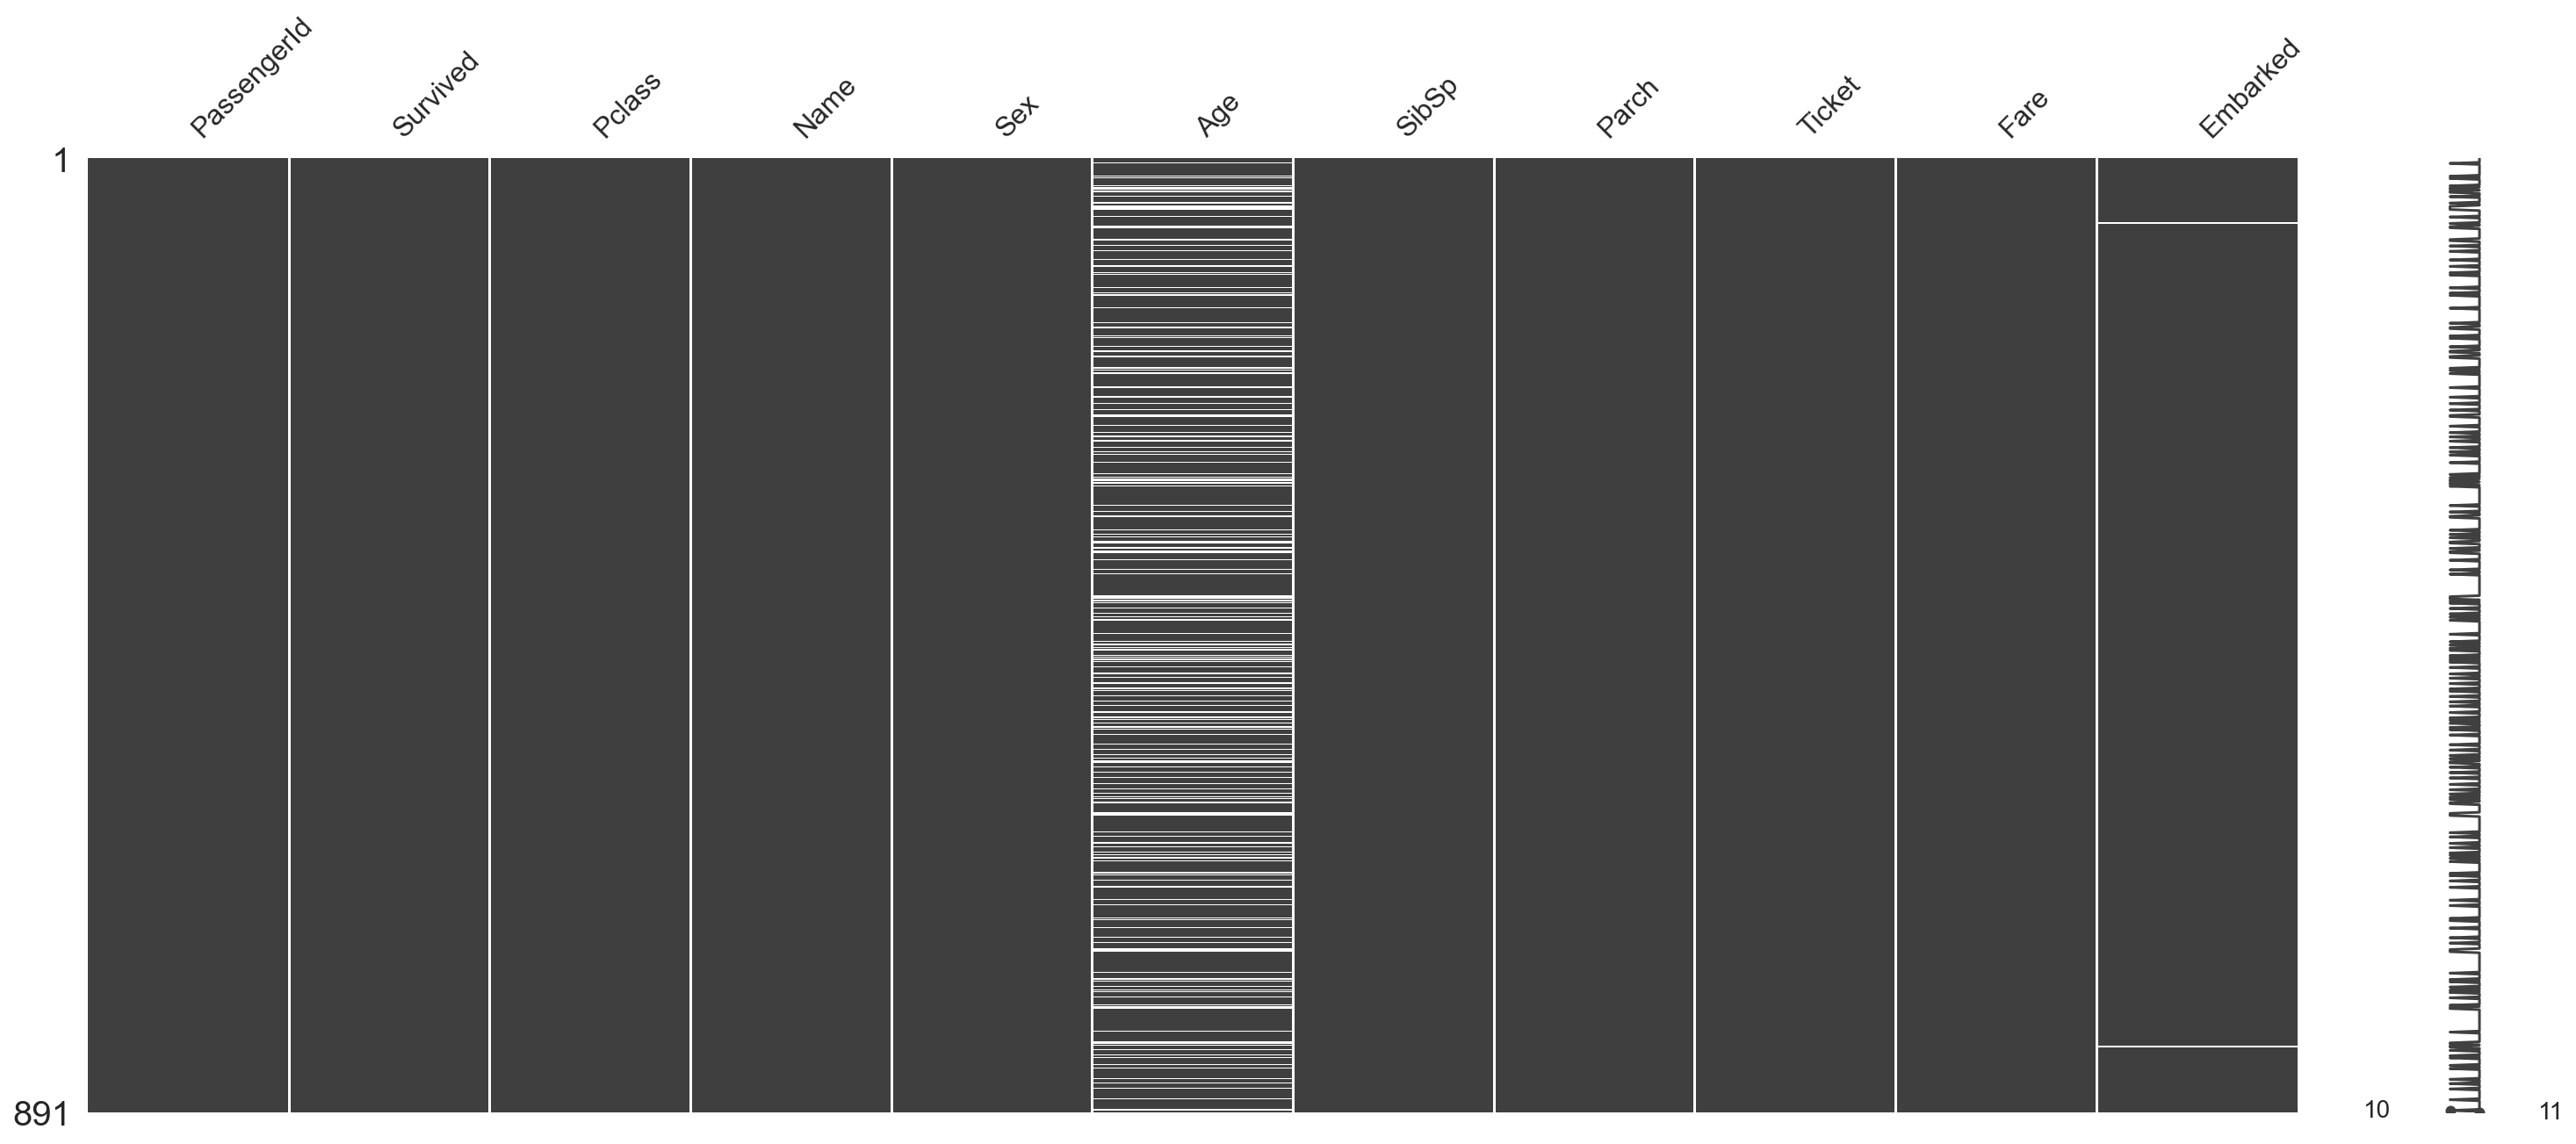

In [23]:
result_df = titanic_df.dropna(thresh=int(len(titanic_df) * 0.8), axis=1)
msno.matrix(result_df)

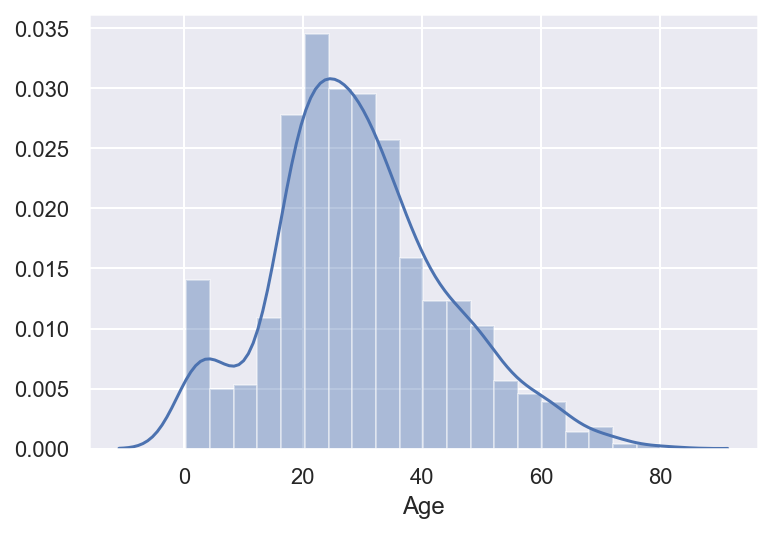

In [24]:
# 연령 데이터 채우기
# 수치형 데이터는 평균값이나 중앙값을 채워줌
sns.distplot(result_df.Age)

In [25]:
notnull_age = result_df[result_df["Age"].notnull()]["Age"]
median_age = np.median(notnull_age) 
median_age

28.0

In [26]:
result_df["Age"][result_df["Age"].isnull()] = median_age

<ipython-input-26-616729266345>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df["Age"][result_df["Age"].isnull()] = median_age
/Users/jungryolee/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [27]:
result_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


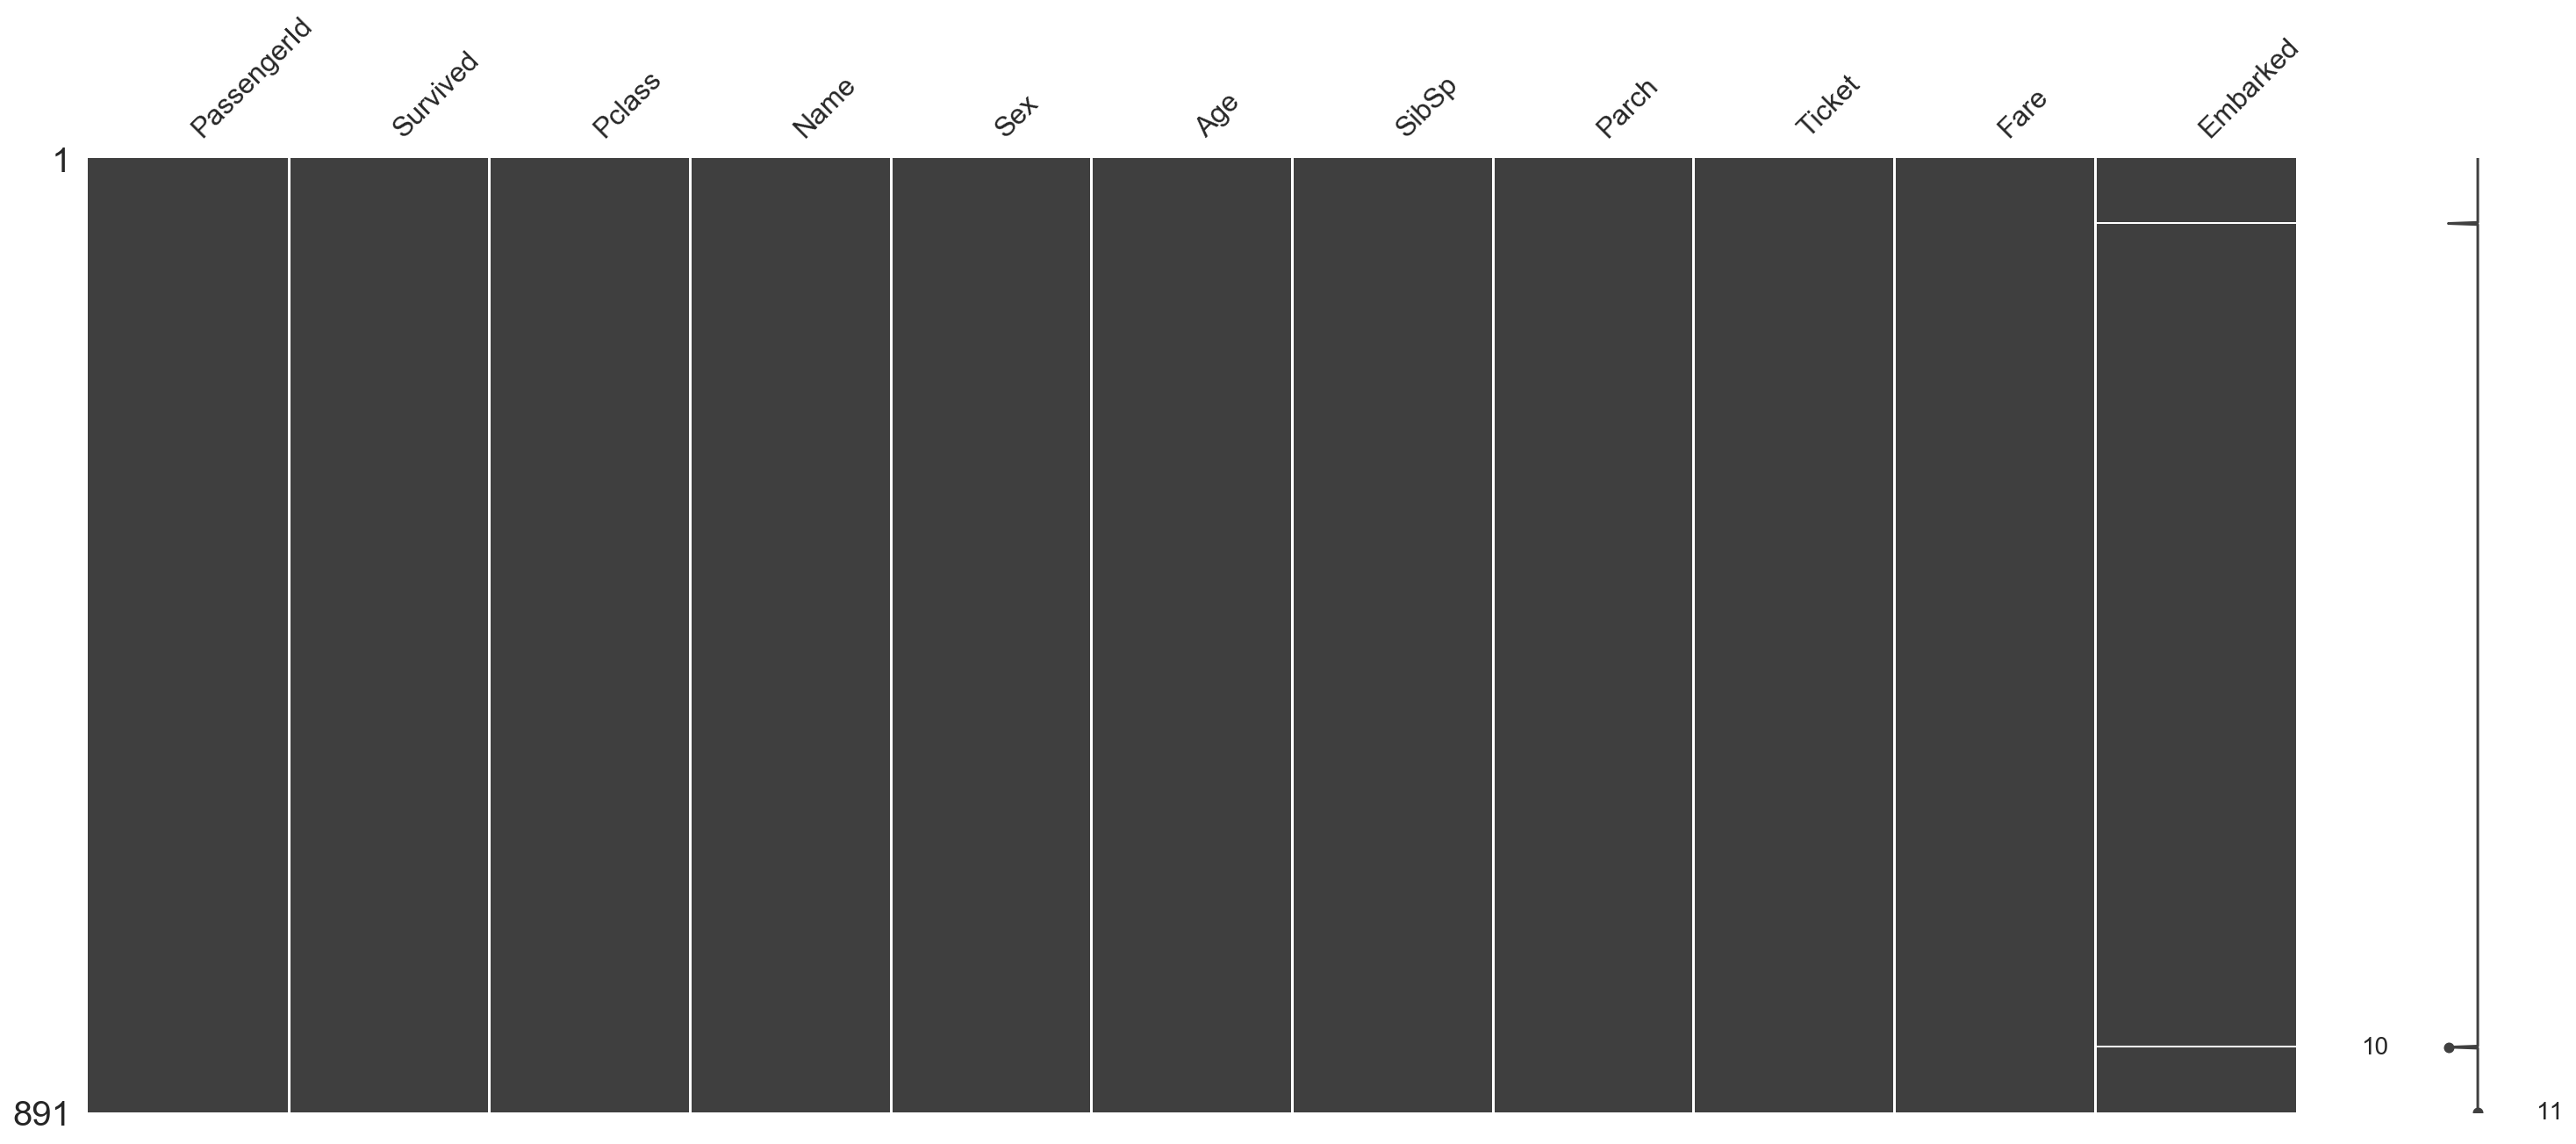

In [59]:
msno.matrix(result_df)

In [ ]:
# 승선위치

In [62]:
data = result_df["Embarked"]

In [70]:
data.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [67]:
result_df["Embarked"][result_df["Embarked"].isnull()] = data.iloc[np.argmax(data.value_counts())]

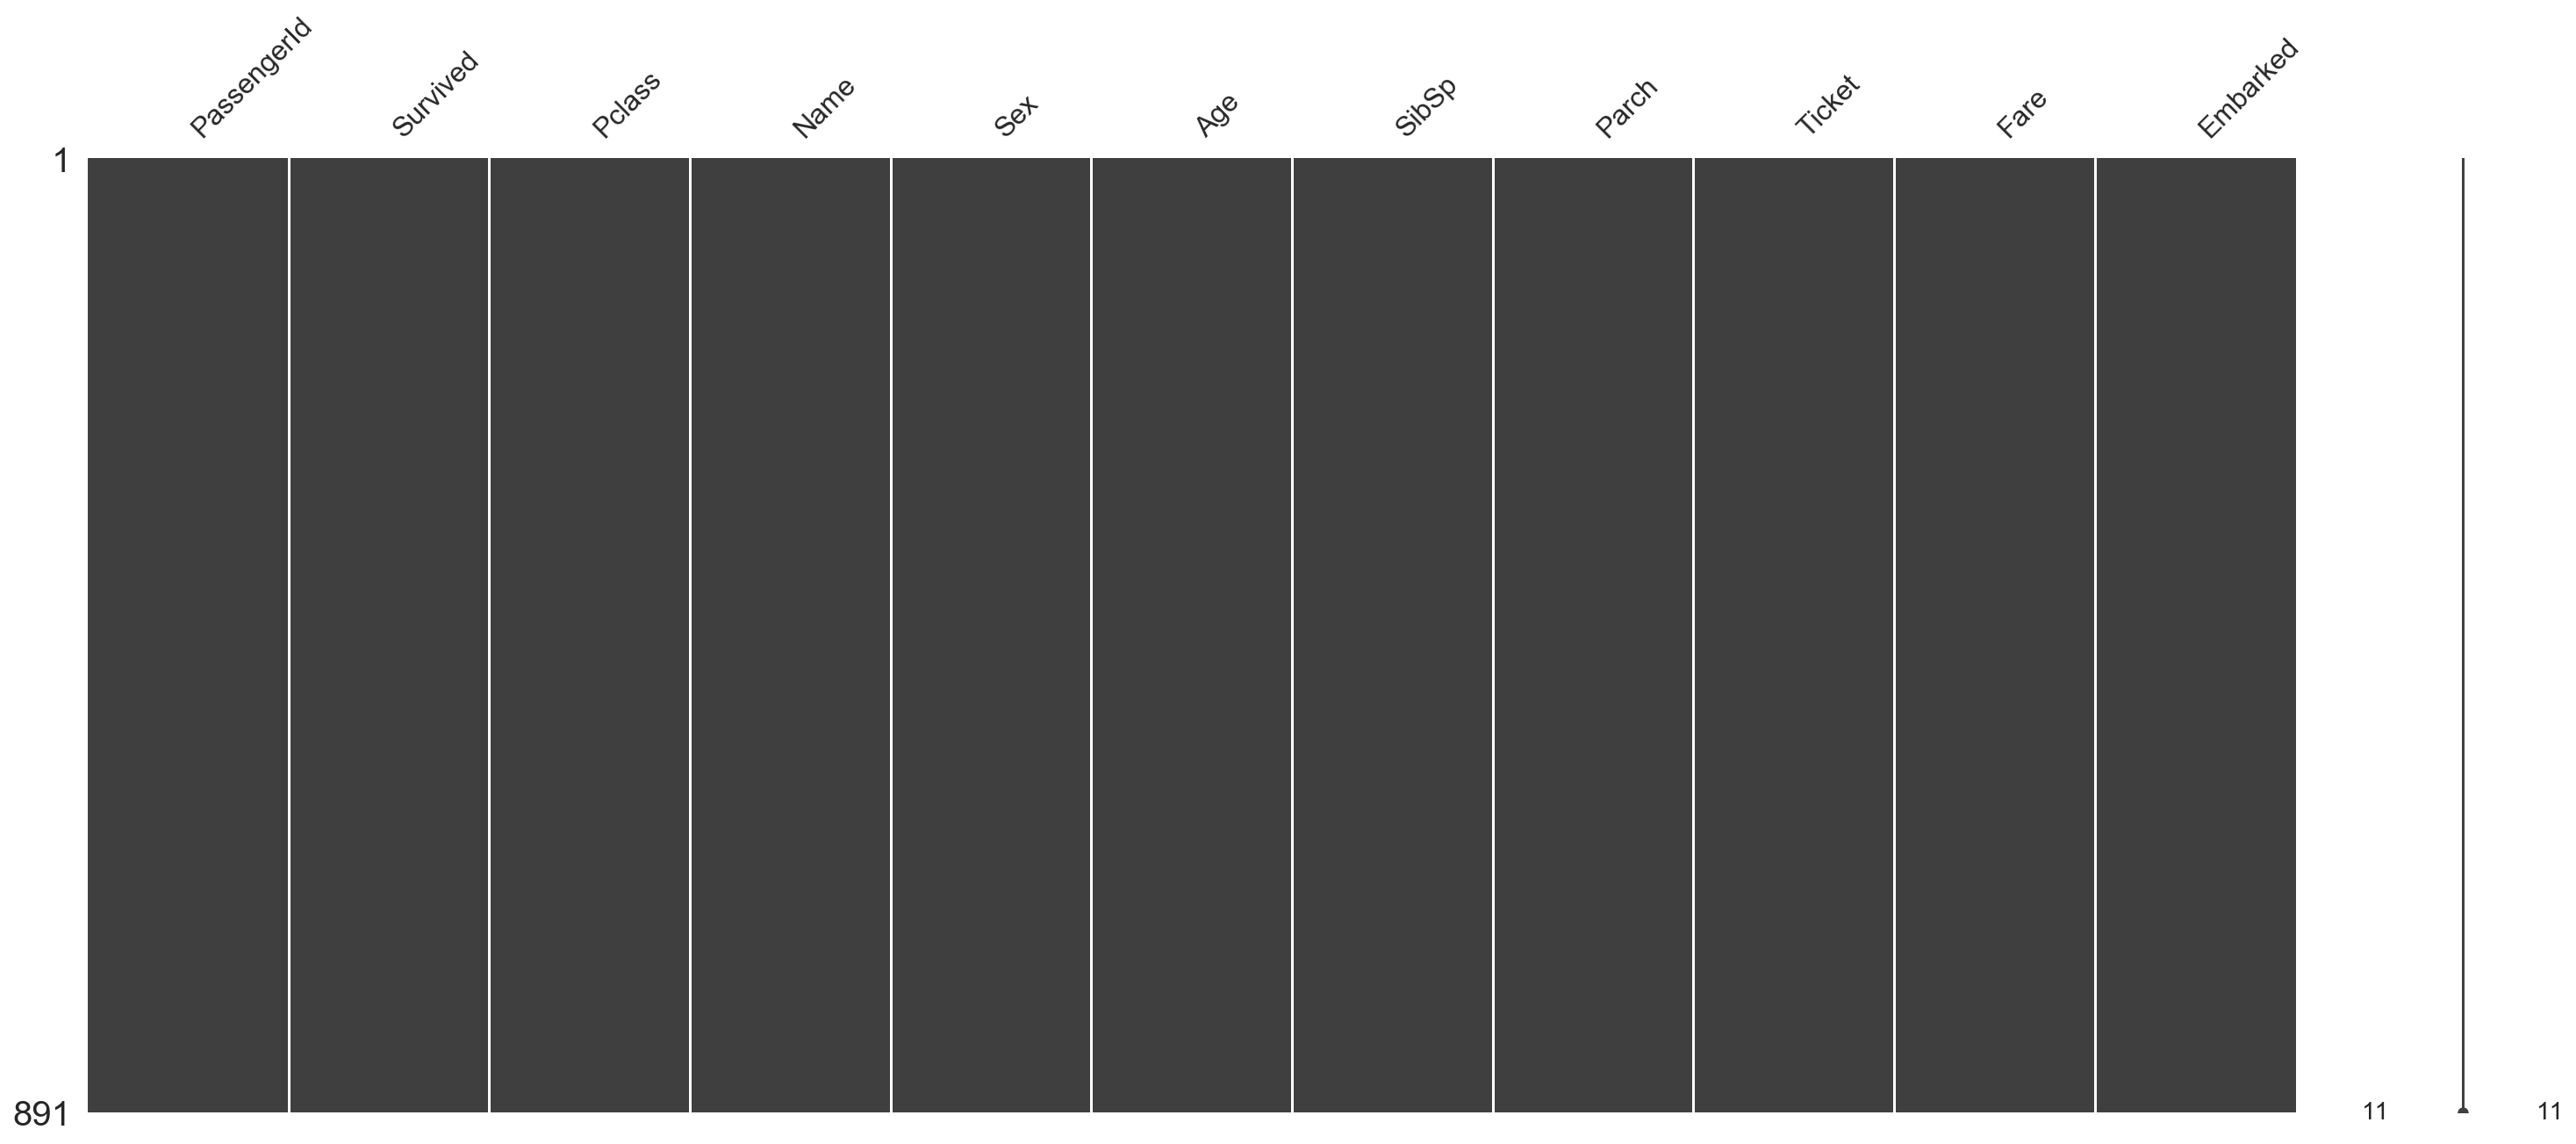

In [68]:
msno.matrix(result_df)

In [72]:
df_1 = result_df[["Pclass", "Age", "SibSp", "Parch", "Fare", "Survived"]]
df_1.tail(2)

,Pclass,Age,SibSp,Parch,Fare,Survived
889,1,26.0,0,0,30.00,1
890,3,32.0,0,0,7.75,0


In [79]:
# 범주형 데이터를 원핫인코딩으로 전처리
df_2 = result_df[["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex", "Embarked","Survived"]]
oh_sex = pd.get_dummies(df_2["Sex"])
oh_embarked = pd.get_dummies(df_2["Embarked"])
df_2 = pd.concat([df_2, oh_sex, oh_embarked], axis==1)
df_2.drop(columns=["Sex", "Embarked"], inplace=True)
df_2 = df_2[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'C', 'Q', 'S', 'Survived']]
df_2.tail(2)

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Survived
889,1,26.0,0,0,30.00,0,1,1,0,0,1
890,3,32.0,0,0,7.75,0,1,0,1,0,0


In [80]:
# 데이터셋 분리

In [83]:
from sklearn.model_selection import train_test_split

In [102]:
# df_x = df_1.drop(columns=["Survived"])
# df_y = df_1["Survived"]

df_x = df_2.drop(columns=["Survived"])
df_y = df_2["Survived"]

train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.2, random_state=1)

In [103]:
len(train_x), len(test_x)

(712, 179)

In [104]:
# 모델학습 : DecisionTree

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
from sklearn.svm import SVC

In [118]:
# model = DecisionTreeClassifier().fit(train_x, train_y)
model = SVC(probability=True).fit(train_x, train_y)

In [93]:
pred_y = model.predict(test_x)

In [94]:
pred_y

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1])

In [96]:
np.array(test_y)

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

In [100]:
len(pred_y[pred_y == np.array(test_y)]) / len(np.array(test_y))

0.6424581005586593

In [101]:
model.score(test_x, test_y)

0.6424581005586593

In [107]:
model.score(test_x, test_y)

0.7653631284916201

In [114]:
model.score(test_x, test_y)

0.6536312849162011

In [115]:
test_x[:2]

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
862,1,48.0,0,0,25.9292,1,0,0,0,1
223,3,28.0,0,0,7.8958,0,1,0,0,1


In [116]:
model.predict(test_x[:2])

array([0, 0])

In [119]:
model.predict_proba(test_x[:2])

array([[0.69473934, 0.30526066],
       [0.73272119, 0.26727881]])